# Why Feature Scaling is important?

In [1]:
#Import data
import pandas as pd
import numpy as np

df = pd.read_csv('iris.csv')
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


Features <b>sepal_length</b>, <b>sepal_width</b>, <b>petal_length</b>, <b>petal_width</b> are measured on different scales, which could cause wrong prediction accuracy, if two features are in different scales.

Standardizing featuers are essential because, most of the linear classifiers assume that the data is normall distributed and not having a standardized can affect the way gradient descent assigns its weights (larger scales may require higher weights!) so impacting the overall accuracy. 

However, tree based classifiers are not impacted with feature scaling as they don't rely on Euclidean distance/Gradient Descent. They purely depend on the Information Gain or Impurity Measures.

Some additional Pre-processing steps, to convert "Categorical" into numerical representation of Labels

In [2]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [3]:
df["species"] = df["species"].astype('category')

In [4]:
df.dtypes

sepal_length     float64
sepal_width      float64
petal_length     float64
petal_width      float64
species         category
dtype: object

In [5]:
df["species"] = df["species"].cat.codes
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<b>Standardization and Min-Max scaling</b>

In [6]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(df[['sepal_length', 'sepal_width','petal_length','petal_width']])
df_std = std_scale.transform(df[['sepal_length', 'sepal_width','petal_length','petal_width']])

minmax_scale = preprocessing.MinMaxScaler().fit(df[['sepal_length', 'sepal_width','petal_length','petal_width']])
df_minmax = minmax_scale.transform(df[['sepal_length', 'sepal_width','petal_length','petal_width']])

In [7]:
print('Mean after standardization:\nsepal_length={:.2f}, sepal_width={:.2f}, petal_length={:.2f}, petal_width={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean(), df_std[:,2].mean(), df_std[:,3].mean()))
print('\nStandard deviation after standardization:\nsepal_length={:.2f}, sepal_width={:.2f}, petal_length={:.2f}, petal_width={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std(), df_std[:,2].mean(), df_std[:,3].mean()))

Mean after standardization:
sepal_length=-0.00, sepal_width=-0.00, petal_length=0.00, petal_width=-0.00

Standard deviation after standardization:
sepal_length=1.00, sepal_width=1.00, petal_length=0.00, petal_width=-0.00


In [8]:
print('Min-value after min-max scaling:\nsepal_length={:.2f}, sepal_width={:.2f}, petal_length={:.2f}, petal_width={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min(), df_minmax[:,2].min(), df_minmax[:,3].min()))
print('\nMax-value after min-max scaling:\nsepal_length={:.2f}, sepal_width={:.2f}, petal_length={:.2f}, petal_width={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max(), df_minmax[:,2].max(), df_minmax[:,3].max()))

Min-value after min-max scaling:
sepal_length=0.00, sepal_width=0.00, petal_length=0.00, petal_width=0.00

Max-value after min-max scaling:
sepal_length=1.00, sepal_width=1.00, petal_length=1.00, petal_width=1.00


Plotting to understand the Feature Scaling

In [9]:
%matplotlib inline

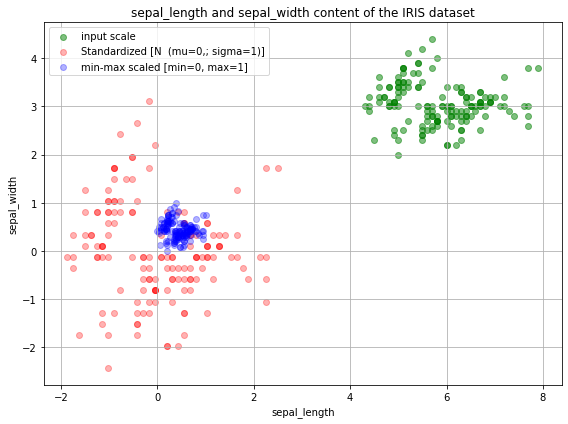

In [10]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['sepal_length'], df['sepal_width'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [N  (mu=0,; sigma=1)]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('sepal_length and sepal_width content of the IRIS dataset')
    plt.xlabel('sepal_length')
    plt.ylabel('sepal_width')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

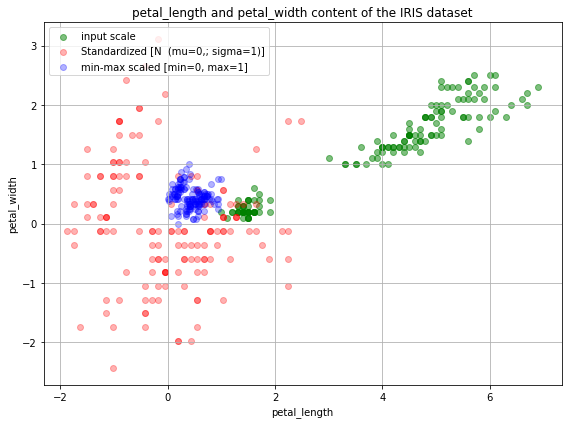

In [11]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['petal_length'], df['petal_width'],
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red',
            label='Standardized [N  (mu=0,; sigma=1)]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1],
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('petal_length and petal_width content of the IRIS dataset')
    plt.xlabel('petal_length')
    plt.ylabel('petal_width')
    plt.legend(loc='upper left')
    plt.grid()

    plt.tight_layout()

plot()
plt.show()

From the above plots, its evident that the scaling has helped the features to be on standardized scale (Red and Blue points] compared to the origincal Green points. In the following plot, we will zoom in into the three different axis-scales:

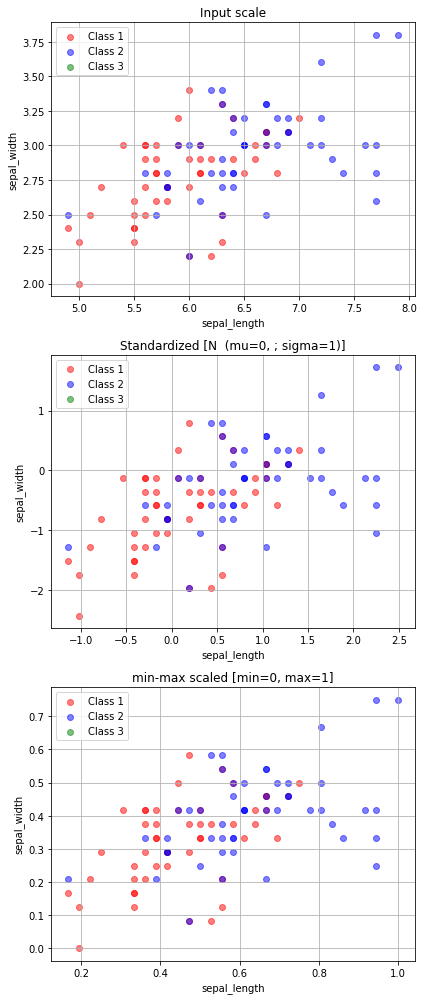

In [12]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['sepal_length', 'sepal_width']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [N  (mu=0, ; sigma=1)]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['species'].values == i, 0],
                  d[df['species'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('sepal_length')
    ax[a].set_ylabel('sepal_width')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

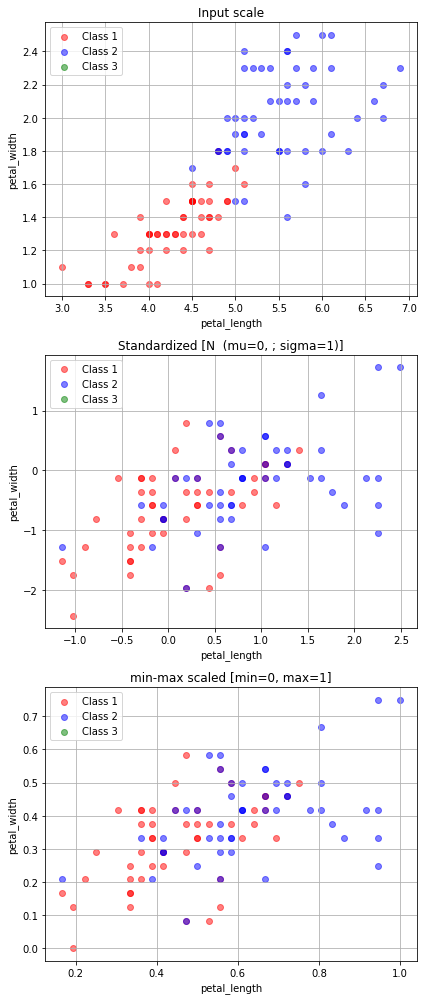

In [13]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)),
               (df[['petal_length', 'petal_width']].values, df_std, df_minmax),
               ('Input scale',
                'Standardized [N  (mu=0, ; sigma=1)]',
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['species'].values == i, 0],
                  d[df['species'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('petal_length')
    ax[a].set_ylabel('petal_width')
    ax[a].legend(loc='upper left')
    ax[a].grid()

plt.tight_layout()

plt.show()

Let's analyze impact on PCA with and without non-standard features

Dividing the dataset into a separate training and test dataset

In [14]:
from sklearn.model_selection import train_test_split

X_wine = df.values[:,0:4]
y_wine = df.values[:,4]

X_train, X_test, y_train, y_test = train_test_split(X_wine, y_wine,
    test_size=0.30, random_state=12345)

Feature Scaling - Standardization

In [15]:
from sklearn import preprocessing

std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

Perform PCA

In [16]:
from sklearn.decomposition import PCA

# on non-standardized data
pca = PCA(n_components=2).fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)


# om standardized data
pca_std = PCA(n_components=2).fit(X_train_std)
X_train_std = pca_std.transform(X_train_std)
X_test_std = pca_std.transform(X_test_std)

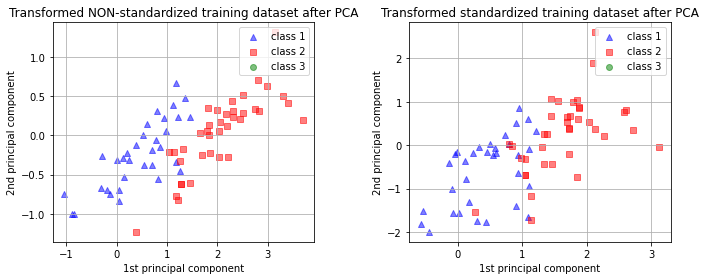

In [17]:
from matplotlib import pyplot as plt

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))


for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train==l, 0], X_train[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

for l,c,m in zip(range(1,4), ('blue', 'red', 'green'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train==l, 0], X_train_std[y_train==l, 1],
        color=c,
        label='class %s' %l,
        alpha=0.5,
        marker=m
        )

ax1.set_title('Transformed NON-standardized training dataset after PCA')    
ax2.set_title('Transformed standardized training dataset after PCA')    

for ax in (ax1, ax2):

    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()
plt.tight_layout()

plt.show()  


From the above plots we can see how standardizing features helped PCA to have  better split on the classes

Training a naive Bayes classifier

In [18]:
from sklearn.naive_bayes import GaussianNB

# on non-standardized data
gnb = GaussianNB()
fit = gnb.fit(X_train, y_train)

# on standardized data
gnb_std = GaussianNB()
fit_std = gnb_std.fit(X_train_std, y_train)

Evaluating the classification accuracy with and without standardization

In [19]:
from sklearn import metrics

pred_train = gnb.predict(X_train)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train)))

pred_test = gnb.predict(X_test)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))


Prediction accuracy for the training dataset
87.62%

Prediction accuracy for the test dataset
93.33%



In [20]:
pred_train_std = gnb_std.predict(X_train_std)

print('\nPrediction accuracy for the training dataset')
print('{:.2%}'.format(metrics.accuracy_score(y_train, pred_train_std)))

pred_test_std = gnb_std.predict(X_test_std)

print('\nPrediction accuracy for the test dataset')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))


Prediction accuracy for the training dataset
86.67%

Prediction accuracy for the test dataset
93.33%



Note: Overall having standardinzed features hasn't helped in in improving the classification accuracy ain this case, however it's a recommended step to perform so the models perform better